In [45]:
#| echo: false
from utils import build_buttons
from importlib import reload
import utils
reload(utils)
utils.build_buttons(link= 'browser_automation', 
              github= 'https://github.com/yinleon/inspect-element/blob/main/browser_automation.ipynb',
              citation= True)


<a type="button" class="btn btn-outline-primary btn-sm" target="_blank" href="https://inspectelement.org/browser_automation">📖 Read online</a>
<a type="button" class="btn btn-outline-primary btn-sm" target="_blank" href="https://colab.research.google.com/github/yinleon/inspect-element/blob/main/browser_automation.ipynb">🖥️ Interactive version</a>
<a type="button" class="btn btn-outline-primary btn-sm" target="_blank" href="https://github.com/yinleon/inspect-element/blob/main/browser_automation.ipynb">⚙️ GitHub</a>
<a type="button" class="btn btn-outline-primary btn-sm" target="_self" href="#citation">❞ Citation</a>
<br>


# Intro

Browser automation is used to programmatically interact with web applications. 

Its primary use is to test websites (internally) by simulating user behavior (mouse clicks, scrolling, etc), but it can also be used for web scraping.

Browser automation isn’t always the best situation for building a dataset, but it is necessary when you need to:

1. **Scrape rendered HTML**: browser automation lets you see what's on a website as a user would.
1. **Simulate user behavior**: comes in handy when you want to experiment with personalization.
1. **Wait for scripts and code to execute**: let's you retrieve information that requires a code to run behind the scenes.

Some popular browser automation tools are [Puppeteer](https://pptr.dev/), [Playwright](https://playwright.dev/), and [Selenium](https://www.selenium.dev/documentation/webdriver/elements/). 

The tutorials in this section will use Selenium in Python.

👉[Click here to jump to the tutorial](#tutorial).


# Case Studies
## Case Study 1: Google Search
In the investigation “[Google the Giant](https://themarkup.org/google-the-giant/2020/07/28/google-search-results-prioritize-google-products-over-competitors),” The Markup wanted to measure how much a Google Search page is “Google.” Aside from the daunting task of classifying what is Google and what isn’t, the team of two investigative journalists; Adrianne Jeffries and Leon Yin (a co-author of this section) needed to measure real estate on a web page.

The team developed a [targeted staining technique](https://themarkup.org/google-the-giant/2020/07/28/how-we-analyzed-google-search-results-web-assay-parsing-tool) inspired by the life sciences called an assay– commonly used to highlight the presence of chemicals, compounds, or cancers. 

<figure>
<img src="assets/browser0_01_threestep1.png"
    alt="https://themarkup.org/google-the-giant/2020/07/28/how-we-analyzed-google-search-results-web-assay-parsing-tool#google-search-flow" 
    width="600px"/ >
<p>Source: <a href="https://themarkup.org/google-the-giant/2020/07/28/how-we-analyzed-google-search-results-web-assay-parsing-tool">
    The Markup
</a>
</figure>

The reporters created over [68 web parsers](https://github.com/the-markup/investigation-google-search-audit/blob/master/utils/parsers.py) to identify each element on a web page that was Google, along with three other categories. Once an element was identified, they could find the coordinates of each element along with its corresponding bounding box. Using the categorization and bounding box, reporters could see how many pixels were allocated to Google properties, as well as where they were placed on a page.

<figure>
<img src="assets/browser0_02_soup1.png"
    alt="https://themarkup.org/google-the-giant/2020/07/28/how-we-analyzed-google-search-results-web-assay-parsing-tool#google-search-flow" 
    width="600px"/ >
<p>Source: <a href="https://themarkup.org/google-the-giant/2020/07/28/how-we-analyzed-google-search-results-web-assay-parsing-tool">
    The Markup
</a>
</figure>

This analysis is only possible by **parsing the rendered HTML page** with a fixed window size (in their case an iPhone X). 

Using browser automation to investigate and audit real estate on a website provides an intuitive metric for self-preferencing and anti-competitive business practices. For example, this case study was placed above the others because one of the co-authors happened to work on it.

## Case Study 2: Google's Ad Network
Over two-thirds of the 1.3 million ad sellers on Google are anonymous.

Watchdog organizations such as [Check My Ads](https://checkmyads.org/branded/google-ads-has-become-a-massive-dark-money-operation/) use methods of de-anonymizing ad buyers to hold Google accountable for funding individuals and organizations that promote hate and spread false information.

In 2022, reporters from ProPublica automated this method using the browser automation tool PlayWright. 

TK HOW THEY DID THIS.

## Case Study 3: TikTok Personalization
An investigation conducted by the Wall Street Journal, "[Inside TikTok's Algorithm](https://www.wsj.com/articles/tiktok-algorithm-video-investigation-11626877477)" found that even when a user does not like, share, or follow any creators, TikTok still personalizes their "For You Page" based on how long they watch the recommended videos.

In particular, the WSJ reporters found that users who watch content related to depression and skip other content are soon presented with mental health content and little else. Importantly, this effect happened even when the users did not explicitly like or share any videos, nor did they follow any creators. 

You can watch the WSJ's video showing how they mimick user behavior to study the effects of personalization:

<figure>
<iframe width="560" height="315" src="https://www.youtube.com/embed/nfczi2cI6Cs"></iframe>
<figcaption align = "left" style="font-size:80%;"> Source: "How Tiktok's Algorithm Figures You Out | WSJ" on YouTube</figcaption>
</figure>

# Tutorial
In the hands-on tutorial we will attempt to study personalization on TikTok. We’re going to teach you the basics of browser automation in Selenium, and similar principles could be used in studying any other service and with other automation tools.

Through the next few tutorials we will try to replicate elements of this study and see if we can trigger personalization. In line with the WSJ investigation, we will use browser automation to watch all TikTok videos where the description mentions keywords of our choosing and skips all others. For this tutorial, we’ll use lighter topics than depression (the example chosen in the WSJ investigation.).

::: {.callout-tip}
#### Pro tip: Minimizing harms
When developing your audits start with low-stakes themes, both to minimize your exposure to damaging content and to avoid boosting their popularity unnecessarily.
:::


In the tutorial you will learn the following practical skills:

* Setting up the automated browser for use with Python
* Hiding typical tell-tales of an automated browser to circumvent anti-bot protections
* Finding particular elements on the screen, reading their content, and interacting with them
* Scrolling
* Taking screenshots
    
    
[//]: # "1. **Tutorial 2: Hardening the setup**"
[//]: # "    * Setting up multiple email addresses for use with testing"
[//]: # "    * Tracking the changing location of elements"
[//]: # "    * Storing cookies for future use"
[//]: # " "
[//]: # "1. **Tutorial 3: Automated browsing and hidden APIs**"
[//]: # "    * Intercepting the background API calls for improved data collection"
[//]: # "    * Combining automated browsing with background API calls"
[//]: # " "   
[//]: # "1. **Tutorial 4: The complete setup**"
[//]: # "    * Experiment design considerations"
[//]: # "    * Data analysis"

Let's get started!

## Step 1: Setting up the browser
Our setup will consist of a real browser and an interface that will allow us to control that browser from python. We chose Google Chrome - not because it's our favorite but because using the most popular browser will help us blend in with real users.

### 1.1 Installing Google Chrome
We will do this tutorial using Google Chrome. Please download the most recent version from [here](https://www.google.com/chrome/).

If you already have Google Chrome installed, please make sure it's at its newest version by opening Chrome and pasting this address in the address bar: [chrome://settings/help](chrome://settings/help) and verifying that there are no pending updates.

![](assets/browser1_01_version1.png "Google Chrome window showing the current version")

### 1.2 Installing the webdriver
Webdriver is our interface between Python and the browser. It is specific to the browser (there are different webdrivers for Firefox, Safari, etc) and even to the particular version of the browser. It's easier to ensure we got the correct version by installing the webdriver that automatically detects the current version of Chrome. Run the code in the cell below to do that.

::: {.callout-tip}
#### Pro tip:
Adding an exclamation mark before code in Jupyter notebook allows you to run commands as if you were in the terminal.
:::

In [46]:
!pip install chromedriver-binary-auto selenium

Let's see if the installation worked correctly! Run the cell below to import the correct webdriver and open a new Chrome window.


In [47]:
from selenium import webdriver
import chromedriver_binary # adds the chromedriver binary to the path

driver = webdriver.Chrome()

The `chrome-driver-auto` package should have installed a driver that's suitable for your current Chrome version running the line of code above should have opened a new Chrome window.

This step is notoriously hard, and you might get a version mismatch error:

```
SessionNotCreatedException: Message: session not created: This version of ChromeDriver only supports Chrome version 112
Current browser version is 113 with binary path /Applications/Google Chrome.app/Contents/MacOS/Google Chrome
```
It means that you probably updated your Chrome in the meantime. To fix it, reinstall the Python package:

In [4]:
!pip install --upgrade --force-reinstall chromedriver-binary-auto

  Using cached chromedriver_binary_auto-0.2.6-py3-none-any.whl
  Attempting uninstall: chromedriver-binary-auto
    Found existing installation: chromedriver-binary-auto 0.2.6
    Uninstalling chromedriver-binary-auto-0.2.6:
      Successfully uninstalled chromedriver-binary-auto-0.2.6


If everything works fine and you have the window open, our setup is complete and you can now close the Chrome window:

In [48]:
driver.close()

## Step 2: Hiding typical tell-tales of an automated browser
When you open Chrome with Selenium you'll notice that the window displays a warning about being an "automated session". 
Even though the warning is only displayed to you, the webdriver leaces behind other red flags that inform website administrators that you are using browser automation.
The website admins will use these red flags to refuse service to your browser.

Let's remove those!

In [52]:
options = webdriver.ChromeOptions()
options.add_argument("start-maximized")

# remove all signs of this being an automated browser
options.add_argument('--disable-blink-features=AutomationControlled')
options.add_experimental_option("excludeSwitches", ["enable-automation"])
options.add_experimental_option('useAutomationExtension', False)

# open the browser with the new options
driver = webdriver.Chrome(options=options)
driver.get('https://tiktok.com/en')

This should open a new window without those warnings and navigate to tiktok.com:

![](assets/browser1_02_tiktok1.png "tiktok main page")




## Step 3: Finding elements on page and interacting with them

We will perform our first attempt at the experiment without logging in, but we will also learn how to create multiple accounts and how to log in later.

Instead of logging in, our first interaction will be dismissing this login window. Doing this programmatically has two steps:

1. We need to identify that \[X\] button in the page source 
2. And then click it

Let's inspect the button:
![](assets/browser1_03_dismiss1.png "Inspecting the Dismiss button")

In my case, the particular element that the Developer Tools navigated to is just the graphic on the button, not the button itself, but you can still find the actual button by hovering your mouse over different elements in the source and seeing what elements on page are highlighted:

![](assets/browser1_04_inspect1.png "Inspecting the Dismiss button")

Our close button is a `<div>` element, whose `data-e2e` attribute is `"modal-close-inner-button"`. 
There are many ways to fish for the exact element you want, and [many of fhose methods](https://www.selenium.dev/documentation/webdriver/elements/locators/) are built into Selenium. One way to find it would be using a CSS_SELECTOR, like so:

In [53]:
from selenium.webdriver.common.by import By

close_button = driver.find_element(By.CSS_SELECTOR, '[data-e2e="modal-close-inner-button"]')
close_button

<selenium.webdriver.remote.webelement.WebElement (session="347dacb1ff10ca3831f6bf4851bbd288", element="20C8A0C764C05A4A24B212FFF15DD4DC_element_75")>

When Selenium successfully finds an element, you’ll get a `WebElement` object of the first match.

We seem to have found something, let's click it! `Web Element`s come equipped with special functions you can use to [interact](https://www.selenium.dev/documentation/webdriver/elements/interactions/) with them:

In [54]:
close_button.click()

Did you notice a change on the page? Congratulations! You just automated the browser to click something.

## Step 4: Scrolling

We now have a browser instance open and displaying the For You Page. Let's scroll through the videos.

If you are a *real person* who (for whatever reason) visits TikTok on their computer, you could press the down key the keyboard to see new videos. We will do that programmatically instead:

In [55]:
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys

actions = ActionChains(driver)
actions.send_keys(Keys.ARROW_DOWN)
actions.perform()

When you run the cell above you will see that your browser scrolls down to the next video. You just automated scrolling!

## Step 5: Finding videos on the page

Now that the site loaded and you can browse it, let's find all the videos that are displayed and extract the meta information from each of them.

1. Right click on the white space around a video and choose "Inspect".
![Inspect Element](assets/browser1_05_inspect_tiktok_a1.png)
1. Hover your mouse over the surrounding `<div>` elements and observe the highlighted elements on the page to see which ones correspond to each tiktok.
![Inspect Element](assets/browser1_05_inspect_tiktok_b1.png)
1. You will see that each video is in a separate `<div>` container but each of these containers has the same `data-e2e` attribute with the value of `recommend-list-item-container`.
1. Similarly to how we found the close button, we can now use this to find all videos on page:

In [56]:
videos = driver.find_elements(By.CSS_SELECTOR, '[data-e2e="recommend-list-item-container"]')

::: {.callout-tip}
#### Pro tip:
When we searched for the "dismiss" button we used the `driver.find_element()` function because we were only interested in the first element that matched our CSS selector.

Now we're trying to find all videos on page, so we use the `driver.find_elements()` function instead - it returns the complete list of elements that match the selector.
:::

In [57]:
videos

[<selenium.webdriver.remote.webelement.WebElement (session="347dacb1ff10ca3831f6bf4851bbd288", element="20C8A0C764C05A4A24B212FFF15DD4DC_element_50")>,
 <selenium.webdriver.remote.webelement.WebElement (session="347dacb1ff10ca3831f6bf4851bbd288", element="20C8A0C764C05A4A24B212FFF15DD4DC_element_96")>,
 <selenium.webdriver.remote.webelement.WebElement (session="347dacb1ff10ca3831f6bf4851bbd288", element="20C8A0C764C05A4A24B212FFF15DD4DC_element_97")>,
 <selenium.webdriver.remote.webelement.WebElement (session="347dacb1ff10ca3831f6bf4851bbd288", element="20C8A0C764C05A4A24B212FFF15DD4DC_element_98")>,
 <selenium.webdriver.remote.webelement.WebElement (session="347dacb1ff10ca3831f6bf4851bbd288", element="20C8A0C764C05A4A24B212FFF15DD4DC_element_99")>,
 <selenium.webdriver.remote.webelement.WebElement (session="347dacb1ff10ca3831f6bf4851bbd288", element="20C8A0C764C05A4A24B212FFF15DD4DC_element_100")>,
 <selenium.webdriver.remote.webelement.WebElement (session="347dacb1ff10ca3831f6bf4851b

## Step 6: Parsing a video post
Now that we found all the videos on the page, let's extract the description from each - this is how we will decide whether to watch this video or to skip it.

1. Pick any description, right click, Inspect. 
1. Let's locate the `<div>` that contains the whole description (including any hashtags) and make note of its `data-e2s` attribute.
1. Now let's write the code that, extracts the description from a single video (note that you can get the text content of any element by calling `element.text`)

In [58]:
for video in videos:
    print(video.find_element(By.CSS_SELECTOR, '[data-e2e="video-desc"]').text)

#fun #funny #funnyvideos #prank #snake #scareprank #fail #failarmy #fyp #foryou #trending #failvideo #learnontiktok
it's not always a matter of strength 💪🏿 #learnfromkhaby #comic #gym
Best ritual for Baizhu pulls #genshin #genshinimpact #genshintok #genshinmeme #baizhu #hoyocreators
I know some of yall can relate .. shit sucks bro 💔😞 #paintok #sadtiktok #fyp #foryoupage
Mayyas' Breathtaking
Audition Captivates Sofia Vergara/ AGT 2022 #AGT #fyp #foryou #THEVOICEKIDS #fypシ゚viral #fpy_tiktok_viral #BGT #THEVOICE #AGTALLSTARS
We’re OBSESSED with this method of cooking our eggs 🤯🍳🔥

Have you tried it? 🤷🏽‍♂️

#fyp #foryou #eggs #foodporn #food
#أم_خالد ينفع اللي مرات ابويا بتعمله معايا ده 🥹


::: {.callout-tip}
#### Pro tip:
We previously searched for elements using `driver.find_element()` and `driver.find_elements()`. That allowed us to search the whole page. Notice that here, instead of `driver`, we're using `video`: this way we can search for elements **within a particular element**, rather than on the whole page.
:::

## Step 7: Finding the video that's currently playing
We know how to scroll to the next video, and we know how to find all videos that are loaded.
At this point we could either:
1) Assume that at the beginning, the 0th video is playing, and then every time we press arrow down, the next video is being displayed
2) Assume that the arrow down does not always work and each time verify which video is actually playing

The problem with the first approach is that even if scrolling fails even just once, our experiment will be compromised - after it happens we will be watching and skipping different videos that our math tells us. This is why we will go with the second approach and veriy which video is actually playing. Back to our favorite tool - inspect element!

When you right click on the playing video, you will see that instead of our familiar UI we get a custom TikTok menu, so that won't work. Try right-clicking on the description of the video instead, then hovering over different elements in the inspector and expanding the one that highlights the video in the browser. Dig deep until you get to the `div` that only contains the video. 


Still in the inspector try looking at the video below. You will see that the `div` that contains the video is missing and there is no element with the tag name `video`. That's how we can find if the video is currently playing - its `div` will contain the `video` element that we can find by `TAG_NAME`:

In [59]:
for video in videos:
    description = video.find_element(By.CSS_SELECTOR, '[data-e2e="video-desc"]').text
    if video.find_elements(By.TAG_NAME, 'video'):
        playing = 'playing'
    else:
        playing = 'not playing'
    print(playing, description)

not playing #fun #funny #funnyvideos #prank #snake #scareprank #fail #failarmy #fyp #foryou #trending #failvideo #learnontiktok
playing it's not always a matter of strength 💪🏿 #learnfromkhaby #comic #gym
not playing Best ritual for Baizhu pulls #genshin #genshinimpact #genshintok #genshinmeme #baizhu #hoyocreators
not playing I know some of yall can relate .. shit sucks bro 💔😞 #paintok #sadtiktok #fyp #foryoupage
not playing Mayyas' Breathtaking
Audition Captivates Sofia Vergara/ AGT 2022 #AGT #fyp #foryou #THEVOICEKIDS #fypシ゚viral #fpy_tiktok_viral #BGT #THEVOICE #AGTALLSTARS
not playing We’re OBSESSED with this method of cooking our eggs 🤯🍳🔥

Have you tried it? 🤷🏽‍♂️

#fyp #foryou #eggs #foodporn #food
not playing #أم_خالد ينفع اللي مرات ابويا بتعمله معايا ده 🥹


## Step 8: Taking screenshots
The presentation of your results might be more compelling, when its accompanied by screenshots, rather than just data. Selenium allows you to take screenshots of the whole screen, or just a particular element (though the latter is a bit cumbersome):

In [60]:
# take a screenshot of the whole browser
driver.save_screenshot('full_screenshot.png')

# take a screenshot of just one video
screenshot = video.screenshot_as_png
with open('element_screenshot.png', 'wb') as output:
    output.write(screenshot)

## Step 9: Putting it all together
We now can read the descriptions of videos and move between them. 
That's most of the setup we need to try a very simple measurement - let's watch all videos that mention cooking in their description and skip all those that don't. After a few hundred, we will see whether we are served more cooking videos over time.

::: {.callout-tip}
#### Pro tip: Use functions!
So far we coded up all the functionality like opening the browser, closing the dialog, finding videos as separate cells in the notebook. We could just copy that code over here to use it, but it will be much easier to understand and maintain the code if we keep the code as functions with easy to understand names
:::

In [63]:
def open_browser():
    """
    Opens a new automated browser window with all tell-tales of automated browser disabled
    """
    options = webdriver.ChromeOptions()
    options.add_argument("start-maximized")

    # remove all signs of this being an automated browser
    options.add_argument('--disable-blink-features=AutomationControlled')
    options.add_experimental_option("excludeSwitches", ["enable-automation"])
    options.add_experimental_option('useAutomationExtension', False)

    # open the browser with the new options
    driver = webdriver.Chrome(options=options)
    driver.get('https://tiktok.com/en')
    return driver

def close_login_dialog(driver):
    """
    Finds and closes the login dialog
    """
    close_button = driver.find_element(By.CSS_SELECTOR, '[data-e2e="modal-close-inner-button"]')
    close_button.click()

def arrow_down(driver):
    """
    Sends the ARROW_DOWN key to a webdriver instance.
    """
    actions = ActionChains(driver)
    actions.send_keys(Keys.ARROW_DOWN)
    actions.perform()
    
def find_videos(driver):
    """
    Finds all videos loaded in the browser
    """
    videos = driver.find_elements(By.CSS_SELECTOR, '[data-e2e="recommend-list-item-container"]')
    return videos

def get_description(video):
    """
    Extracts the video description along with any hashtags
    """
    try:
        description = video.find_element(By.CSS_SELECTOR, '[data-e2e="video-desc"]').text
    except:
        description = ''
    return description

def get_current(videos):
    """
    Given the list of videos it returns the one that's currently playing
    """
    for video in videos:
        if video.find_elements(By.TAG_NAME, 'video'):
            # this one has the video, we can return it and that ends the function.
            return video
    
    return None

def is_target_video(description, keywords):
    """
    Looks for keywords in the given description. Returns true if there are any
    or false when there are none.
    """
    
    # check in any of the keywords is in the description
    for keyword in keywords:
        if keyword in description:
            # we have a video of interest, let's watch it 
            return True
    
    # if we're still here it means no keywords were found
    return False

def screenshot(video, filename="screenshot.png"):
    """
    Saves a screenshot of a given video to a specified file
    """
    screenshot = video.screenshot_as_png
    with open(filename, 'wb') as output:
        output.write(screenshot)
    

Ok, with that out of the way, let's set up our first data collection!

In [67]:
import time

# if the description has any one these words, we will watch the video
keywords = ['food', 'dish', 'cook', 'pizza', 'recipe', 'mukbang', 'dinner']

# this is where will we store decisions we take
decisions = []

driver = open_browser()

close_login_dialog(driver)

for video_index in range(0, 200):
    
    # get all 
    videos = find_videos(driver)
    
    # the current video is the one that's currently showing the video player
    current_video = get_current(videos)
    
    if current_video is None:
        print('no more videos')
        break
              
    # read the description of the video
    description = get_description(current_video)
    
    # make a decision and remember it
    decision = is_target_video(description, keywords)
    decisions.append(decision)
            
    print(video_index, decision, description)
    
    if decision:
        # we have a video of interest, let's take a screenshot
        screenshot(current_video, f"screenshot_{video_index:05}.png")
        # and now watch it for 30 seconds
        time.sleep(30)
    
    # move to the next video
    arrow_down(driver)
    time.sleep(2)
    
driver.close()

0 False #giadinhbadao #funnyvideos #foryou #xuhuong #meme #fyp
1 False it's not always a matter of strength 💪🏿 #learnfromkhaby #comic #gym
2 False I know some of yall can relate .. shit sucks bro 💔😞 #paintok #sadtiktok #fyp #foryoupage
3 False اول مره اعمل فديوهات من دى اعمل منها الفتره الجايه #fyp #غيمه_ورديه #fatma_khaled2
4 False ညီမလေးကို မလုပ်ရက်ဘူး ပြေးပါ #fypage #airstyleglobal1 #mobilelegends #mlbb #foryoupage #tiktokuni #mlbbmyanmartiktok #zxybca #foryou
5 True The perfect pizza doesn’t exi-
6 False Messi 💙❤️🧐 || #messi #pxblitocule #football #futbol #leomessi #fyp #viral #edit #crzgf #zyxcba #tiktokviral #LM10
7 False يلا ميكب للعروسهههه❤️🥰🥰🥰@روووح-Roooh 🦐🔥 ايه رايكو؟❤️🫶🏻 #صاحبه_قلم_الروج_الاحمر #trust_mayar_emad
8 False #movie #film #fyp
9 False 
10 False Bro saw the baddies and turned into prime MJ 😂 (@hoops.editss )
11 False Amazing!! #thevoice #acdc #fyp #foryoupage #foryou #thevoicekids #music #singersoftiktok #talentshow
12 False Chiếc đệm diệu kì 🥹 #GETNET
13 True Wagy

In [65]:
import matplotlib.pyplot as plt

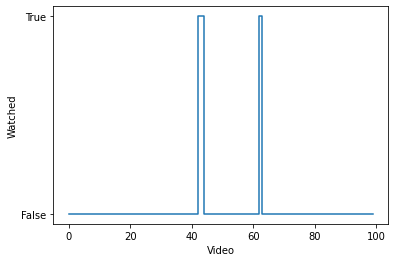

In [66]:
plt.plot(decisions, ds='steps')
plt.xlabel('Video')
plt.ylabel('Watched')
plt.yticks([0, 1], ['False', 'True']);

### Results
The figure above shows the frequency of the appearance of target videos during our 100-videos-long session. You can verify in the folder where this notebook is located if the videos we watched were really food related because of the screenshots we saved. If the feed was indeed increasingly filled with food videos, we would see more an more lines towards the right of the graph. At least here it does not appear to be the case. 

Does it mean that the WSJ audit was wrong or that TikTok stopped personalizing content? No, for a number of reasons: 

1. We only scrolled through 100 videos, this is likely too few to observe any effects. Try re-running with a higher number!
1. When studying personalization you should use an account per profile and make sure you're logged in, rather than relying on a fresh browser. So, instead of closing the login dialog, try actually logging in! You know how to find and click buttons, and [this is how you put text in text fields](https://www.geeksforgeeks.org/send_keys-element-method-selenium-python/).
1. When you're not logged in, you will be presented with content from all over the world, in all languages. If your filters keywords in one language only, you will miss plenty of target content in other languages.
1. You should always have a baseline to compare to. In this case, you should probably run two accounts at the same time - one that watches food videos and one that doesn't. Then you compare the prevalence of food videos between these two.
1. The WSJ audit was run on the mobile app rathern than on a desktop browser. Perhaps personalization works differently depending on which platform you're running your study.

## Advanced Usage

Above we highlighted some ideas to make your investigation or study more robust, some are methodoligical choices, but others are technical.

There are some advanced use-cases and tasks you can perform with browser automation that include
- X
- Y
- Z

We may cover some or all of these topics in subsequent tutorials.

Let us know what you're interested in learning more about!

# Related Readings

More tutorials on the same subject:<br>
- "[Using real browsers](https://scrapism.lav.io/using-real-browsers/)" - Sam Lavigne

Notable investigations and audits using browser automation:<br>
- "[Blacklight](https://themarkup.org/blacklight)" - a tool by investigative journalist Surya Mattu<br>
- "[TheirTube](https://www.their.tube/)" - an art and advocacy project by Tomo Kihara<br>
- "[Worlds Apart](https://www.nrk.no/osloogviken/xl/tiktok-doesn_t-show-the-war-in-ukraine-to-russian-users-1.15921522)" - an investigation into TikTok by Henrik Bøe and Christian Nicolai Bjørke<br>
- "[WebSearcher](https://github.com/gitronald/WebSearcher)" - A Python package by Ronald E. Robertson<br>
- "[Googling for Abortion](https://journalqd.org/article/view/2752)" - Yelena Mejova, Tatiana Gracyk, and Ronald E. Robertson

Please reach out with more examples to add.

# Citation

To cite this chapter, please use the following BibTex entry:

<pre>
@incollection{inspect2023browser,
  author    = {Sapiezynski, Piotr and Yin, Leon},
  title     = {Browser Automation},
  booktitle = {Inspect Element: A practitioner's guide to auditing algorithms and hypothesis-driven investigations},
  year      = {2023},
  editor    = {Yin, Leon and Sapiezynski, Piotr and Raji, Inioluwa Deborah},
  note      = {\url{https://inspectelement.org}}
}
</pre>
